<a href="https://colab.research.google.com/github/AnaKarenDRIV/FinanzasUniversitarias/blob/main/RED%20NEURONAL%20MULTI%20CAPA%20/predicci%C3%B3n_de_combustible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 374.5466 - root_mean_squared_error: 19.0648 - val_loss: 27.7223 - val_root_mean_squared_error: 5.2652
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.0562 - root_mean_squared_error: 4.2361 - val_loss: 16.8933 - val_root_mean_squared_error: 4.1101
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.5537 - root_mean_squared_error: 3.3843 - val_loss: 14.9787 - val_root_mean_squared_error: 3.8702
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.0637 - root_mean_squared_error: 3.1626 - val_loss: 11.1134 - val_root_mean_squared_error: 3.3337
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7791 - root_mean_squared_error: 3.1221 - val_loss: 12.1480 - val_root_mean_squared_error: 3.4854


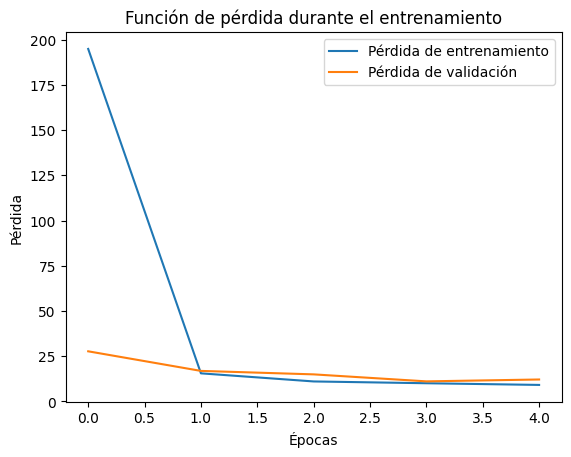

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.0201 - root_mean_squared_error: 3.4665 
Test Mean Absolute Error: 3.49
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
     Actual  Predicted
82     23.0  22.846714
167    29.0  27.078253
356    32.4  33.961090
120    19.0  17.467386
385    38.0  38.245506
R²: 0.8247598632535607
MSE: 12.148044999010295


In [1]:
# Conjunto de datos
# La base de datos Auto MPG, es un conjunto de datos clásico utilizado en problemas de regresión,
# que contiene información sobre la eficiencia de combustible (millas por galón, o MPG)
# de diferentes automóviles fabricados en los años 70 y principios de los 80.

!pip install ucimlrepo

# Importamos la función para obtener datasets de UCI
from ucimlrepo import fetch_ucirepo

# fetch dataset (traemos el dataset con id=9 que corresponde a Auto MPG)
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
# X contendrá las características (features) y y las etiquetas/target (mpg)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Mostramos el conjunto X
X.head()

# El conjunto de datos contiene 398 instancias con las siguientes características:
# cylinders: Número de cilindros del motor.
# displacement: Desplazamiento del motor (en pulgadas cúbicas).
# horsepower: Potencia del motor (en caballos de fuerza).
# weight: Peso del vehículo (en libras).
# acceleration: Tiempo que toma acelerar de 0 a 60 mph (en segundos).
# model year: Año del modelo del automóvil.
# origin: Origen del automóvil (1: EEUU, 2: Europa, 3: Japón).
# Estas son nuestras variables de entrada (features).

# Mostramos el conjunto y (la variable objetivo)
y.head()

# El conjunto de datos contiene 398 instancias con la siguiente variable objetivo:
# mpg: Eficiencia de combustible (millas por galón) — nuestra variable objetivo.

# ------------------------------------------------------
# PREPROCESAMIENTO DE DATOS
# ------------------------------------------------------

# Notamos cuántas variables nulas tiene el conjunto X e y.
X.info()

y.info()

# Hacemos lo siguiente para eliminar las filas con valores nulos y eliminarlas simultáneamente.
import pandas as pd

# Concatenamos X e y en un solo DataFrame y eliminamos filas con NA
df = pd.concat([X, y], axis=1).dropna()

# Notamos cuántas variables nulas tiene el conjunto tras eliminar NAs
df.info()

# Finalmente nuevamente, debemos definir los conjuntos X e y
X = df.drop('mpg', axis=1)  # Todas las columnas menos 'mpg' serán las características
y = df['mpg']               # 'mpg' es la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)

# Notemos que la longitud del conjunto de entrenamiento y de test son respectivamente:
print(X_train.shape)
print(X_test.shape)

# Escalar los datos para que los datos tengan una media de 0 y una desviación estándar de 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajusta el scaler con X_train y lo transforma
X_test = scaler.transform(X_test)        # Transforma X_test con los parámetros ajustados en X_train

# También, se puede utilizar MinMaxScaler() si se prefiere escalar entre 0 y 1.

# ------------------------------------------------------
# RED NEURONAL MULTICAPA (REGRESIÓN)
# ------------------------------------------------------

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo secuencial de Keras para regresión
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Capa densa de 64 neuronas, ReLU, entrada con dimensión = #features
    Dense(32, activation='relu'),                                   # Capa oculta de 32 neuronas, ReLU
    Dense(16, activation='relu'),                                   # Capa oculta de 16 neuronas, ReLU
    Dense(1)                                                         # Capa de salida con 1 neurona (valor continuo para mpg)
])

# Se utiliza Sequential para definir el modelo de red neuronal.
# Se añaden capas ocultas densamente conectadas (Dense) con activación ReLU
# y una capa de salida con activación identidad (por defecto) para predecir el consumo (regresión).

# ------------------------------------------------------
# COMPILAR EL MODELO
# ------------------------------------------------------

from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',                 # Error cuadrático medio como función de pérdida (MSE)
    metrics=['root_mean_squared_error'],       # Métrica: RMSE para monitorizar
)

# Se compila el modelo utilizando el optimizador Adam y la función de pérdida MSE.

# ------------------------------------------------------
# ENTRENAR EL MODELO
# ------------------------------------------------------

history = model.fit(
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
)

# Se entrena el modelo en los datos de entrenamiento utilizando fit.
# epochs: número de pasadas completas por los datos de entrenamiento.
# batch_size=1 indica que cada actualización de gradiente usa 1 muestra (SGD puro).
# validation_data se usa para evaluar en cada época el desempeño en el conjunto de prueba.

# ------------------------------------------------------
# GRÁFICANDO LA FUNCIÓN DE PÉRDIDA
# ------------------------------------------------------

import matplotlib.pyplot as plt

# Graficar la función de pérdida (training vs validation)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()

# Se espera que la función de pérdida tienda a disminuir con las épocas.

# ------------------------------------------------------
# EVALUACIÓN
# ------------------------------------------------------

# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

# Nota: dependiendo de la versión de Keras, las métricas devueltas pueden variar de nombre.
# Aquí se imprime la métrica reportada (root_mean_squared_error) como ejemplo.

# ------------------------------------------------------
# PREDICCIONES
# ------------------------------------------------------

# Hacer predicciones y comparar las predicciones con los valores reales
predictions = model.predict(X_test)

# Creamos un DataFrame comparando valores reales y predichos
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())

# ------------------------------------------------------
# OTRAS MÉTRICAS
# ------------------------------------------------------

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
